In [12]:
import QuantLib as ql

In [13]:
ql.Euribor10M()

<QuantLib.QuantLib.Euribor10M; proxy of <Swig Object of type 'boost::shared_ptr< Euribor10M > *' at 0x0000020752060300> >

In [57]:
p=ql.PlainVanillaPayoff(ql.Option.Call,1.0)

In [58]:
p.optionType()

1

In [59]:
p.strike()

1.0

In [17]:
import QuantLib as ql 
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# option data
maturity_date = ql.Date(15, 1, 2016)
spot_price = 127.62
strike_price = 130
volatility = 0.20 # the historical vols or implied vols
dividend_rate =  0.0163
option_type = ql.Option.Call

risk_free_rate = 0.001
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

calculation_date = ql.Date(8, 5, 2015)
ql.Settings.instance().evaluationDate = calculation_date

In [19]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
settlement = calculation_date

am_exercise = ql.AmericanExercise(settlement, maturity_date)
american_option = ql.VanillaOption(payoff, am_exercise)

eu_exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, eu_exercise)

In [20]:
p=american_option.payoff()

In [21]:
p(strike_price +10)

10.0

In [22]:
payoff.strike()

130.0

In [23]:
payoff(strike_price -10)

0.0

In [24]:
payoff(strike_price +10)

10.0

In [25]:
eu_exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, eu_exercise)

In [26]:
am_exercise

<QuantLib.QuantLib.AmericanExercise; proxy of <Swig Object of type 'boost::shared_ptr< AmericanExercise > *' at 0x0000020752060270> >

In [27]:
spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts)

In [28]:
steps = 200
binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
american_option.setPricingEngine(binomial_engine)
print (american_option.NPV())

6.84210328728556


In [29]:
def binomial_price(option, bsm_process, steps):
    binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
    option.setPricingEngine(binomial_engine)
    return option.NPV()

steps = range(5, 200, 1)
eu_prices = [binomial_price(european_option, bsm_process, step) for step in steps]
am_prices = [binomial_price(american_option, bsm_process, step) for step in steps]
# theoretican European option price
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()

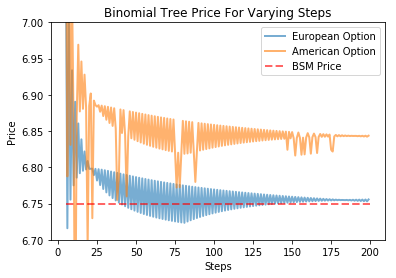

In [30]:
plt.plot(steps, eu_prices, label="European Option", lw=2, alpha=0.6)
plt.plot(steps, am_prices, label="American Option", lw=2, alpha=0.6)
plt.plot([5,200],[bs_price, bs_price], "r--", label="BSM Price", lw=2, alpha=0.6)
plt.xlabel("Steps")
plt.ylabel("Price")
plt.ylim(6.7,7)
plt.title("Binomial Tree Price For Varying Steps")
plt.legend()

In [31]:
q=ql.SimpleQuote(0.01)

In [32]:
q.setValue(0.02)

In [33]:
q2=ql.SimpleQuote(0.03)

In [34]:
q.value()

0.02

In [35]:
qlh=ql.QuoteHandle(q)
qlh2=ql.QuoteHandle(q2)

In [36]:
c=ql.CompositeQuote(qlh,qlh2,lambda x,y:x+y)

In [37]:
print(c.value())

0.05


In [38]:
d=ql.DerivedQuote(qlh,lambda x:x/2.)

In [39]:
d.value()

0.01

In [40]:
ql.QuoteHandle(q)

<QuantLib.QuantLib.QuoteHandle; proxy of <Swig Object of type 'std::vector< Handle< Quote > >::value_type *' at 0x00000207520603C0> >

In [41]:
stock=ql.Stock(ql.QuoteHandle(q))

In [42]:
stock.NPV()

0.02

In [43]:
composite = ql.CompositeInstrument()

In [44]:
composite.add(stock, 2.0)

In [45]:
composite.NPV()

0.04

In [46]:
flag = None
def raiseFlag():
    global flag
    flag = 1

In [47]:
me1 = ql.SimpleQuote(0.0)
h = ql.RelinkableQuoteHandle(me1)
s = ql.Stock(h)
s.NPV()

0.0

In [48]:
obs = ql.Observer(raiseFlag)

In [49]:
calc_date = ql.Date(26, 7, 2016)
ql.Settings.instance().evaluationDate = calc_date

In [50]:
flat_rate = ql.SimpleQuote(0.0015)
rate_handle = ql.QuoteHandle(flat_rate)
day_count = ql.Actual360()
calendar = ql.UnitedStates()
ts_yield = ql.FlatForward(calc_date, rate_handle, day_count)
ts_handle = ql.YieldTermStructureHandle(ts_yield)

In [51]:
issue_date = ql.Date(15, 7, 2016)
maturity_date = ql.Date(15, 7, 2021)
tenor = ql.Period(ql.Semiannual)
calendar = ql.UnitedStates()
bussiness_convention = ql.Unadjusted
date_generation = ql.DateGeneration.Backward
month_end = False
schedule = ql.Schedule (issue_date, maturity_date, 
                        tenor, calendar, 
                        bussiness_convention,
                        bussiness_convention, 
                        date_generation, 
                        month_end)

In [52]:
settlement_days = 2
day_count = ql.Thirty360()
coupon_rate = .03
coupons = [coupon_rate]

# Now lets construct the FixedRateBond
settlement_days = 0
face_value = 100
fixed_rate_bond = ql.FixedRateBond(
    settlement_days, 
    face_value, 
    schedule, 
    coupons, 
    day_count)

In [53]:
bond_engine = ql.DiscountingBondEngine(ts_handle)
fixed_rate_bond.setPricingEngine(bond_engine)
fixed_rate_bond.NPV()

114.18461651948999

In [54]:
flat_rate.setValue(0.0065)
fixed_rate_bond.NPV()

111.5097766266561

In [55]:
flat_rate.setValue(0.0015)
fixed_rate_bond.NPV()

114.18461651948999